<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Тренировочная-и-тестовая-выборки" data-toc-modified-id="Тренировочная-и-тестовая-выборки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Тренировочная и тестовая выборки</a></span></li><li><span><a href="#Метод-векторизации-&quot;TF-IDF&quot;" data-toc-modified-id="Метод-векторизации-&quot;TF-IDF&quot;-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Метод векторизации "TF-IDF"</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Модель-LinearSVC" data-toc-modified-id="Модель-LinearSVC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LinearSVC</a></span></li><li><span><a href="#Модель-MultinomialNB" data-toc-modified-id="Модель-MultinomialNB-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель MultinomialNB</a></span></li><li><span><a href="#Модель-KNeighborsClassifier" data-toc-modified-id="Модель-KNeighborsClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель KNeighborsClassifier</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Модель-LinearSVC" data-toc-modified-id="Модель-LinearSVC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель LinearSVC</a></span></li><li><span><a href="#Модель-MultinomialNB" data-toc-modified-id="Модель-MultinomialNB-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель MultinomialNB</a></span></li><li><span><a href="#Модель-KNeighborsClassifier" data-toc-modified-id="Модель-KNeighborsClassifier-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель KNeighborsClassifier</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

**Загрузим библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import numpy as np
from numpy.random import RandomState
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")

**Подгрузим датасет**

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')

**Посмотрим на общую информацию**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


**Пропуски в наборе данных отсутствуют, а тип данных соответствует содержимому.**

**Посмотрим на содержимое данных.**

In [4]:
pd.set_option('display.max_colwidth', 1000)

In [5]:
data.head()

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


**Текст комеентариев написан на английском языке. В дальнейшем нужно подобрат корректный лемматизатор.**

**Проверим, есть ли дубликаты в наборе.**

In [6]:
print('\nКоличество дубликатов в наборе данных -', data.duplicated().sum())


Количество дубликатов в наборе данных - 0


**Посмотрим на баланс классов.**

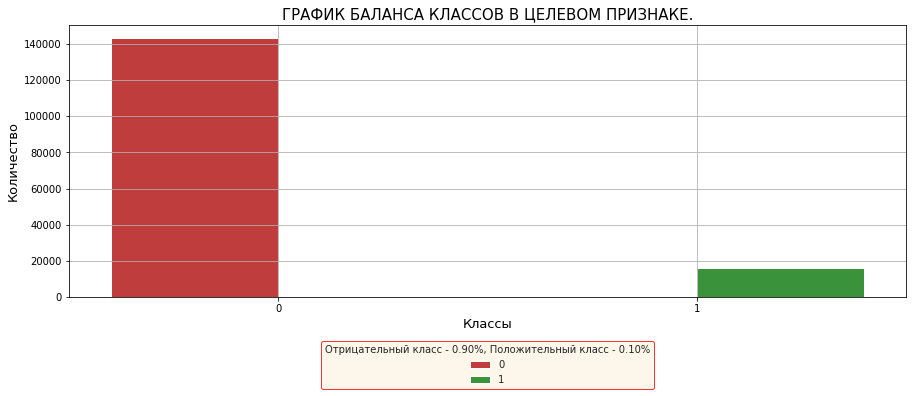

In [7]:
plt.figure(figsize=[15, 5])
plt.title('ГРАФИК БАЛАНСА КЛАССОВ В ЦЕЛЕВОМ ПРИЗНАКЕ.', fontsize=15)
palette = {0: 'tab:red', 1: 'tab:green'}
sns.set_style('darkgrid')
sns.barplot(x=data['toxic'].value_counts().index,
            y=data['toxic'].value_counts(),
            hue=data['toxic'].value_counts().index,
           palette=palette)
plt.ylabel('Количество', fontsize=13)
plt.xlabel('Классы', fontsize=13)
plt.grid(True)
negative_class = data['toxic'].value_counts(normalize=True)[0]
positive_class = data['toxic'].value_counts(normalize=True)[1]
plt.legend(title=f'Отрицательный класс - {negative_class:.2f}%, Положительный класс - {positive_class:.2f}%', 
           loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.25))
plt.show();

**Присутствует дисбаланс классов.**

**Рассмотрим тест комментариев.**

In [8]:
data.head()

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


**В тексте присутствуют неинформативные символы. Для улучшения работы будущих моделей необходимо "почистить" текст.**

In [9]:
data = data.sample(50000).reset_index(drop=True)

In [10]:
def clear_text(dirty_string):
    new_string = dirty_string.lower()
    new_string = re.sub(r"(?:\n|\r)", "", new_string)
    new_string = re.sub(r'[^a-zA-Z\ ]', " ", new_string).strip()
    return new_string

In [11]:
%%time
data['text'] = data['text'].apply(clear_text)

CPU times: user 730 ms, sys: 11 ms, total: 741 ms
Wall time: 759 ms


In [12]:
data.head()

,text,toxic
0,as an islamist you don t find it shocking to see someone drinking drinking what alcohol gasoline piss can you have a great conversation with someone who is intoxicated in vino veritas,1
1,no it wasn t scrapped alicia s version remains as the original and cent s version is just a sample of it also her version charted in the us and received plenty of coverage enough to have its own separate article regards,0
2,new edits the new edits overwrite what was an account of planck s classification cited by guggenheim so that account was not uncited though the edit cover note complained of lack of citation the term unrealistic is not used by those sources and is an unnecessary editorial interpolation it seems the new edit was made without consultation of the cited sources the further comments are gratuitous uncited editorial opinion and do not reflect what the cited sources planck and guggenheim say,0
3,null set interection of people capable of writing vital articles to fa quality of content prose with people willing to put up with wiki aggressive antics decide what you want,0
4,olyeller wrote finding news articles from reliable and independent sources would shut me up if you do that i ll make the text say annual myself there are at least two reliable and independent sources that mention the second annual everybody draw mohammed day one is the news international at http www thenews com pk todaysprintdetail aspx id cat dt the second is the daily times at http www dailytimes com pk default asp page c c cstory pg therefore the criterion has been met to call this an annual event,0


**Теперь приведем все слова к их лемме.**

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
def lemmatize_sentence(sentence):
    lemmatized_text = []
    lst_with_words = nltk.word_tokenize(sentence)
    for word in lst_with_words:
        initial_word = lemmatizer.lemmatize(word)
        lemmatized_text.append(initial_word)
    return " ".join(lemmatized_text)

In [16]:
%%time
data['text'] = data['text'].apply(lemmatize_sentence)

CPU times: user 29.4 s, sys: 124 ms, total: 29.5 s
Wall time: 29.6 s


In [ ]:
#КОД РЕВЬЮЕРА
# from tqdm import tqdm
# warnings.filterwarnings('ignore')

# tqdm.pandas(desc="progress bar!")

# data['text'] = data['text'].progress_apply(lemmatize_sentence)

### Тренировочная и тестовая выборки

In [17]:
features = data.drop(['toxic'], axis=1)
target = data['toxic']

In [18]:
features_train, features_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [19]:
del features, target, data

### Метод векторизации "TF-IDF"

**В качестве метода векторизации выбрал TF-IDF. Методу так же передадим атрибут stop_words, для того чтобы избавится от неинформативных слов. Обучать векторизатор будем на тренировочной выборке (корпусе).**

In [20]:
corpus_train = features_train['text'].values.astype('U')
corpus_test = features_test['text'].values.astype('U')

In [21]:
del features_train, features_test

**Учитывая большое количество слов, буду использовать подход основанный на n-граммах, так же ограничим количество векторов параметрами min_df и max_df.**

In [22]:
count_tf_idf = TfidfVectorizer(ngram_range=(1,2),
                               stop_words=stop_words,
                               min_df=3,
                               max_df=0.9,
                               strip_accents='unicode',
                               use_idf=1,
                               smooth_idf=1,
                               sublinear_tf=1)

In [23]:
tf_df = count_tf_idf.fit(corpus_train)

In [24]:
x_train = tf_df.transform(corpus_train)
x_test = tf_df.transform(corpus_test)

In [25]:
del count_tf_idf, tf_df, corpus_train, corpus_test

### Заключение

- **Из текста удалены все не информативные символы и слова.**


- **Каждое слово приведено к его лемме.**


- **Слова в тексте векторизованы.**


- **Обнаружен дисбаланс классов.**

## Обучение

In [26]:
dct_with_models_param = {}

In [27]:
state = RandomState(12345)

**Для дальнейшего обучения выбрал несколько моделей.**

**Для корректировки баланса выбрал метод взвешенных весов.**

### Модель LogisticRegression

In [28]:
%%time
model_lr_for_search = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
params = dict(C=np.arange(1, 20, 1))
search_for_lr = RandomizedSearchCV(model_lr_for_search, 
                                   params,
                                   scoring='f1',
                                   random_state=state)
search_for_lr.fit(x_train, y_train)
dct_with_models_param['LR'] = search_for_lr.best_params_
dct_with_models_param['LR'].update(train_f1=search_for_lr.best_score_)

CPU times: user 4min 3s, sys: 4min 43s, total: 8min 47s
Wall time: 8min 48s


In [29]:
del model_lr_for_search, search_for_lr

In [30]:
%%time
test_model_lr = LogisticRegression(solver='liblinear',
                                   C=dct_with_models_param['LR']['C'],
                                   class_weight='balanced',
                                   random_state=state,
                                   max_iter=1000)
test_model_lr.fit(x_train, y_train)

CPU times: user 7.15 s, sys: 9.5 s, total: 16.6 s
Wall time: 16.6 s


LogisticRegression(C=13, class_weight='balanced', max_iter=1000,
                   random_state=RandomState(MT19937) at 0x7FD86645CC40,
                   solver='liblinear')

### Модель DecisionTreeClassifier

In [31]:
%%time
model_dtc_for_search = DecisionTreeClassifier(class_weight='balanced')
params = dict(max_depth=np.arange(10, 100, 10),
              splitter=['best', 'random'],
              min_samples_leaf=[1, 3])
search_for_dtc = RandomizedSearchCV(model_dtc_for_search, 
                                   params,
                                   scoring='f1',
                                   random_state=state)
search_for_dtc.fit(x_train, y_train)
dct_with_models_param['DTC'] = search_for_dtc.best_params_
dct_with_models_param['DTC'].update(train_f1=search_for_dtc.best_score_)

CPU times: user 6min 56s, sys: 0 ns, total: 6min 56s
Wall time: 6min 56s


In [32]:
del model_dtc_for_search, search_for_dtc

In [33]:
%%time
test_model_dtc = DecisionTreeClassifier(max_depth=dct_with_models_param['DTC']['max_depth'], 
                                       splitter=dct_with_models_param['DTC']['splitter'],
                                       min_samples_leaf=dct_with_models_param['DTC']['min_samples_leaf'],
                                       class_weight='balanced',
                                       random_state=state)
test_model_dtc.fit(x_train, y_train)

CPU times: user 11.2 s, sys: 0 ns, total: 11.2 s
Wall time: 11.3 s


DecisionTreeClassifier(class_weight='balanced', max_depth=70,
                       random_state=RandomState(MT19937) at 0x7FD86645CC40,
                       splitter='random')

### Модель LinearSVC

In [34]:
%%time
model_lsvc_for_search = LinearSVC(random_state=state, class_weight='balanced')
params = dict(C=np.arange(0.1, 1, 0.1))
search_for_lsvc = RandomizedSearchCV(model_lsvc_for_search, 
                                   params,
                                   scoring='f1',
                                   random_state=state)
search_for_lsvc.fit(x_train, y_train)
dct_with_models_param['LinearSVC'] = search_for_lsvc.best_params_
dct_with_models_param['LinearSVC'].update(train_f1=search_for_lsvc.best_score_)

CPU times: user 18.3 s, sys: 0 ns, total: 18.3 s
Wall time: 18.4 s


In [35]:
del model_lsvc_for_search, search_for_lsvc

In [36]:
%%time
test_model_lsvc = LinearSVC(C=dct_with_models_param['LinearSVC']['C'], 
                          class_weight='balanced',
                          random_state=state)
test_model_lsvc.fit(x_train, y_train)

CPU times: user 657 ms, sys: 0 ns, total: 657 ms
Wall time: 664 ms


LinearSVC(C=0.6, class_weight='balanced',
          random_state=RandomState(MT19937) at 0x7FD86645CC40)

### Модель MultinomialNB

In [37]:
%%time
model_mnb_for_search = MultinomialNB()
params = dict(alpha=[0,1], fit_prior=[True, False])
search_for_mnb = RandomizedSearchCV(model_mnb_for_search,
                                    params,
                                    scoring='f1')
search_for_mnb.fit(x_train, y_train)
dct_with_models_param['MNB'] = search_for_mnb.best_params_
dct_with_models_param['MNB'].update(train_f1=search_for_mnb.best_score_)

CPU times: user 589 ms, sys: 0 ns, total: 589 ms
Wall time: 598 ms


In [38]:
del model_mnb_for_search, search_for_mnb

In [39]:
%%time
test_model_mnb = MultinomialNB(alpha=dct_with_models_param['MNB']['alpha'], 
                          fit_prior=dct_with_models_param['MNB']['fit_prior'])
test_model_mnb.fit(x_train, y_train)

CPU times: user 16.1 ms, sys: 0 ns, total: 16.1 ms
Wall time: 15.4 ms


MultinomialNB(alpha=1, fit_prior=False)

### Модель KNeighborsClassifier

In [42]:
%%time
model_knb_for_search = KNeighborsClassifier()
params = dict(weights=['uniform', 'distance'],
              p=[1,2],
              leaf_size=np.arange(10,40,1),
              metric=['minkowski', 'chebyshev'],
              n_neighbors=np.arange(5, 40, 10))
search_for_knb = RandomizedSearchCV(model_knb_for_search,
                                    params,
                                    scoring='f1')
search_for_knb.fit(x_train, y_train)
dct_with_models_param['KNB'] = search_for_knb.best_params_
dct_with_models_param['KNB'].update(train_f1=search_for_knb.best_score_)

CPU times: user 30min 31s, sys: 40.8 s, total: 31min 12s
Wall time: 31min 15s


In [43]:
del model_knb_for_search, search_for_knb

In [44]:
%%time
test_model_knb = KNeighborsClassifier(weights=dct_with_models_param['KNB']['weights'],
                                      p=dct_with_models_param['KNB']['p'],
                                      n_neighbors=dct_with_models_param['KNB']['n_neighbors'],
                                      leaf_size=dct_with_models_param['KNB']['leaf_size'],
                                      metric=dct_with_models_param['KNB']['metric'])
test_model_knb.fit(x_train, y_train)

CPU times: user 3.61 ms, sys: 3.5 ms, total: 7.11 ms
Wall time: 6.72 ms


KNeighborsClassifier(leaf_size=21, p=1)

In [45]:
dct_with_models_param['KNB']

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 5,
 'metric': 'minkowski',
 'leaf_size': 21,
 'train_f1': 0.09871862032091083}

## Тестирование

**С помощью перебора порога классификации попробуем улучшить метрику моделей.**

In [46]:
def get_best_threshold(probabilities_one_test):

    best_f1 = 0
    best_treshold = 0

    for threshold in np.arange(0.1, 0.9, 0.1):
        predicted_valid = probabilities_one_test > threshold
        f1 = f1_score(y_test, predicted_valid)
        if (f1 > best_f1):
            best_f1 = f1
            best_threshold = threshold
            if (best_threshold >= 0.1 ):
                min_boundary = (best_threshold - 0.05)
                max_boundary = (best_threshold + 0.05)
                for updated_threshold in np.arange(min_boundary, max_boundary, 0.01):
                    predicted_valid = probabilities_one_test > updated_threshold
                    f1 = f1_score(y_test, predicted_valid)
                    if (f1 > best_f1):
                        best_f1 = f1
                        best_threshold = updated_threshold
                        
    return [best_f1, best_threshold]

In [47]:
def draw_graph_roc_curve(lst_with_old_f1_and_threshold, probabilities_one_test, model_name):
    
    def find_nearest_num(ar_for_search, val):
        idx = np.abs(ar_for_search - val).argmin()
        return ar_for_search.flat[idx]

    model_name = model_name
    max_val_tpr = 0
    min_val_fpr = 0
    best_f1 = lst_with_old_f1_and_threshold[2]
    best_threshold = lst_with_old_f1_and_threshold[1]
    old_f1 = lst_with_old_f1_and_threshold[0]
    auc_roc = roc_auc_score(y_test, probabilities_one_test)
    fpr, tpr, all_thresholds = roc_curve(y_test, probabilities_one_test)
    nearest_num = find_nearest_num(all_thresholds, best_threshold)
    a = np.where(all_thresholds == nearest_num)
    index = int(a[0])
    max_val_tpr = list(tpr)[index]
    min_val_fpr = list(fpr)[index]
    plt.figure(figsize=[15, 12])
    sns.set_style('darkgrid')
    plt.plot([0,1],[0,1], linestyle ='--', label='Константная модель')
    plt.text((min_val_fpr + 0.02),(max_val_tpr + 0.02), 
             f'THRESHOLD - {best_threshold:.2f}, FPR - {min_val_fpr:.2f}, TPR - {max_val_tpr:.2f}',
             color='r',
             fontsize=16)
    plt.plot(fpr,tpr, color='b', label='ROC-кривая')
    plt.plot([min_val_fpr],[max_val_tpr], 
             'o',
             color='r',
             label=f'Порог классификации - {best_threshold}', markersize=15)
    plt.axvline(x=min_val_fpr, color='r', linestyle='--')
    plt.axhline(y=max_val_tpr, color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR', fontsize=15)
    plt.ylabel('TPR', fontsize=15)
    plt.figtext((min_val_fpr + 0.2), (max_val_tpr - 0.10), f'OLD_F1={old_f1:.2f}, NEW_F1={best_f1:.2f}, AUC_ROC={auc_roc:.2f}', fontsize=17)
    plt.title(f'ROC-Кривая для {model_name}', fontsize=17)
    plt.grid(True)
    plt.legend(edgecolor = 'r', facecolor = 'oldlace')
    plt.show();    

### Модель LogisticRegression

In [48]:
probalities_test_lr = test_model_lr.predict_proba(x_test)
probabilities_one_test_lr = probalities_test_lr[:,1]

In [49]:
best_test_f1, best_threshold_lr = get_best_threshold(probabilities_one_test_lr)

In [50]:
dct_with_models_param['LR'].update(best_threshold=best_threshold_lr)

In [51]:
%%time
dct_with_models_param['LR'].update(test_f1=best_test_f1)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


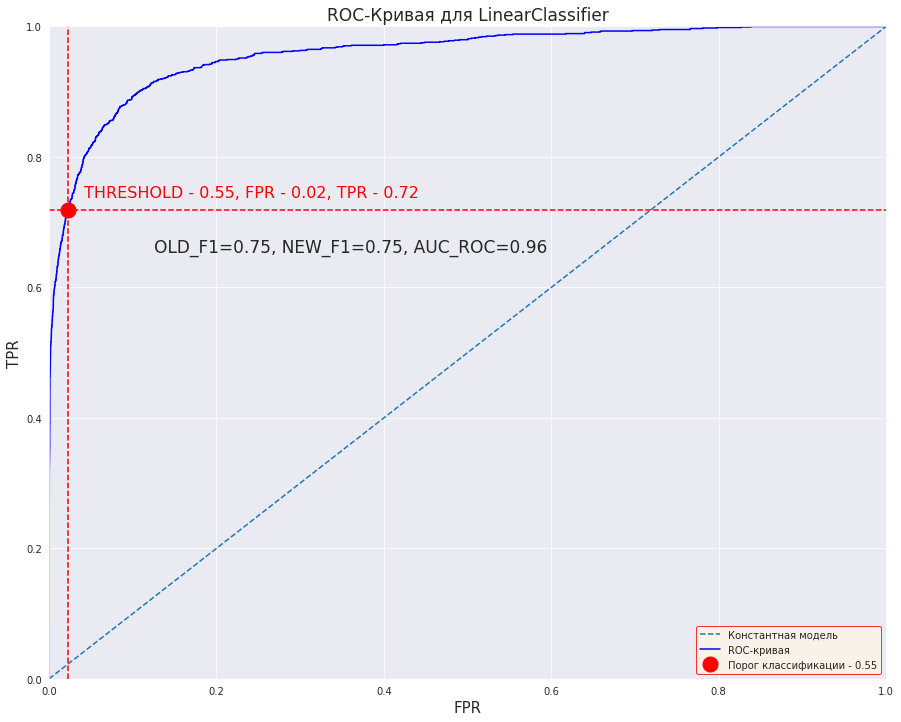

In [52]:
old_f1_test_lr = f1_score(y_test, test_model_lr.predict(x_test))
draw_graph_roc_curve([old_f1_test_lr, best_threshold_lr, best_test_f1], probabilities_one_test_lr, 'LinearClassifier')

### Модель DecisionTreeClassifier

In [53]:
probalities_test_dtc = test_model_dtc.predict_proba(x_test)
probabilities_one_test_dtc = probalities_test_dtc[:,1]

In [54]:
best_test_f1, best_threshold_dtc = get_best_threshold(probabilities_one_test_dtc)

In [55]:
dct_with_models_param['DTC'].update(best_threshold=best_threshold_dtc)

In [56]:
%%time
dct_with_models_param['DTC'].update(test_f1=best_test_f1)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


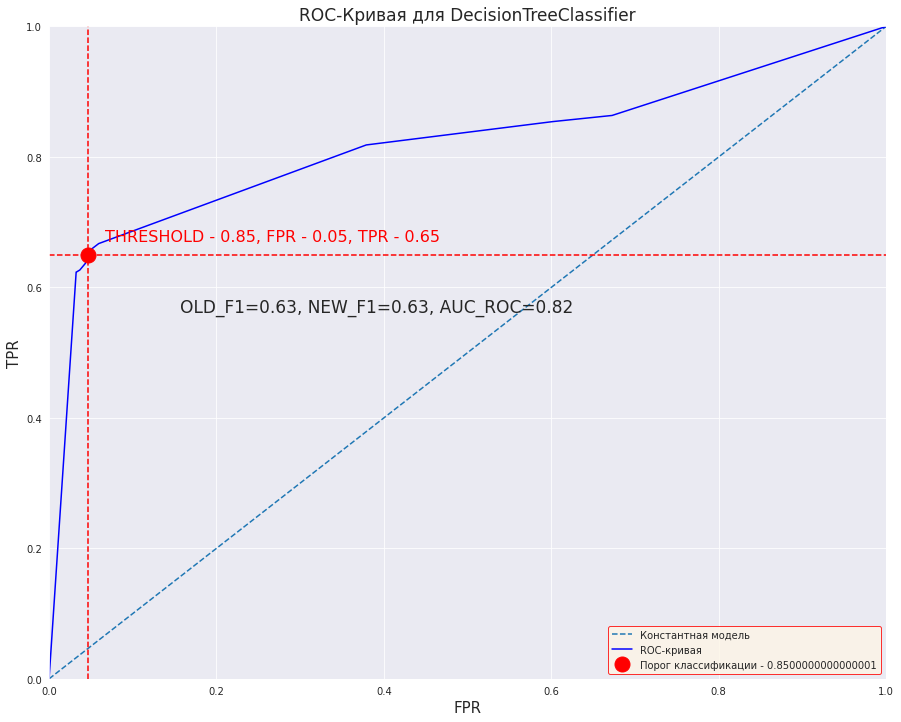

In [57]:
old_f1_test_dtc = f1_score(y_test, test_model_dtc.predict(x_test))
draw_graph_roc_curve([old_f1_test_dtc, best_threshold_dtc, best_test_f1], probabilities_one_test_dtc, 'DecisionTreeClassifier')

### Модель LinearSVC

In [58]:
%%time
dct_with_models_param['LinearSVC'].update(test_f1=f1_score(y_test, test_model_lsvc.predict(x_test)))

CPU times: user 7.38 ms, sys: 422 µs, total: 7.8 ms
Wall time: 6.61 ms


### Модель MultinomialNB

In [59]:
probalities_test_mnb = test_model_mnb.predict_proba(x_test)
probabilities_one_test_mnb = probalities_test_mnb[:,1]

In [60]:
best_test_f1, best_threshold_mnb = get_best_threshold(probabilities_one_test_mnb)

In [61]:
dct_with_models_param['MNB'].update(best_threshold=best_threshold_mnb)

In [62]:
%%time
dct_with_models_param['MNB'].update(test_f1=best_test_f1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


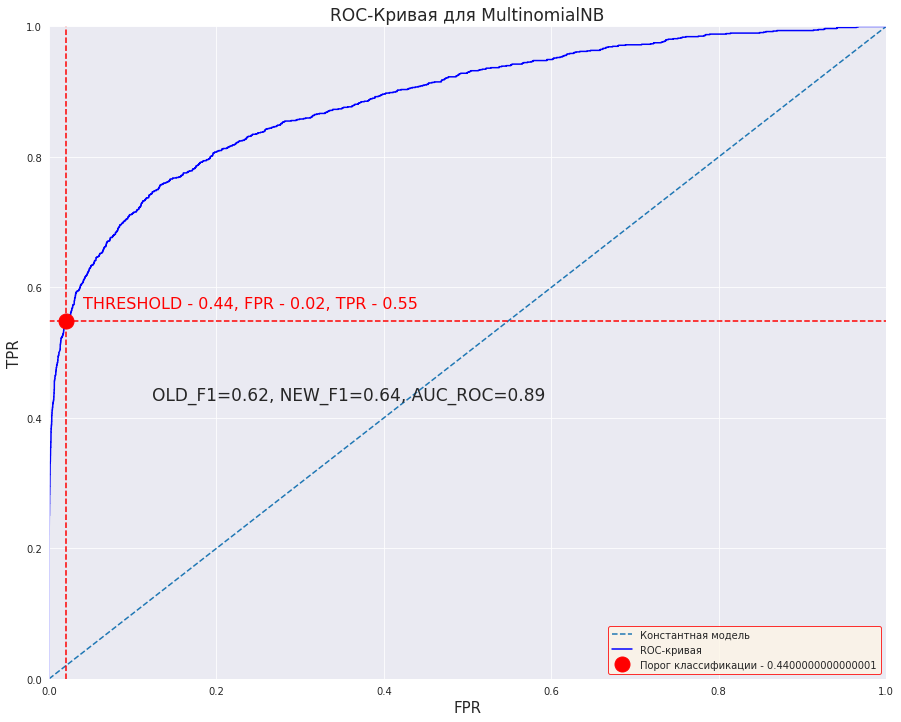

In [63]:
old_f1_test_mnb = f1_score(y_test, test_model_mnb.predict(x_test))
draw_graph_roc_curve([old_f1_test_mnb, best_threshold_mnb, best_test_f1], probabilities_one_test_mnb, 'MultinomialNB')

### Модель KNeighborsClassifier

In [64]:
probalities_test_knb = test_model_knb.predict_proba(x_test)
probabilities_one_test_knb = probalities_test_knb[:,1]

In [65]:
best_test_f1, best_threshold_knb = get_best_threshold(probabilities_one_test_knb)

In [66]:
dct_with_models_param['KNB'].update(best_threshold=best_threshold_knb)

In [67]:
%%time
dct_with_models_param['KNB'].update(test_f1=best_test_f1)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.54 µs


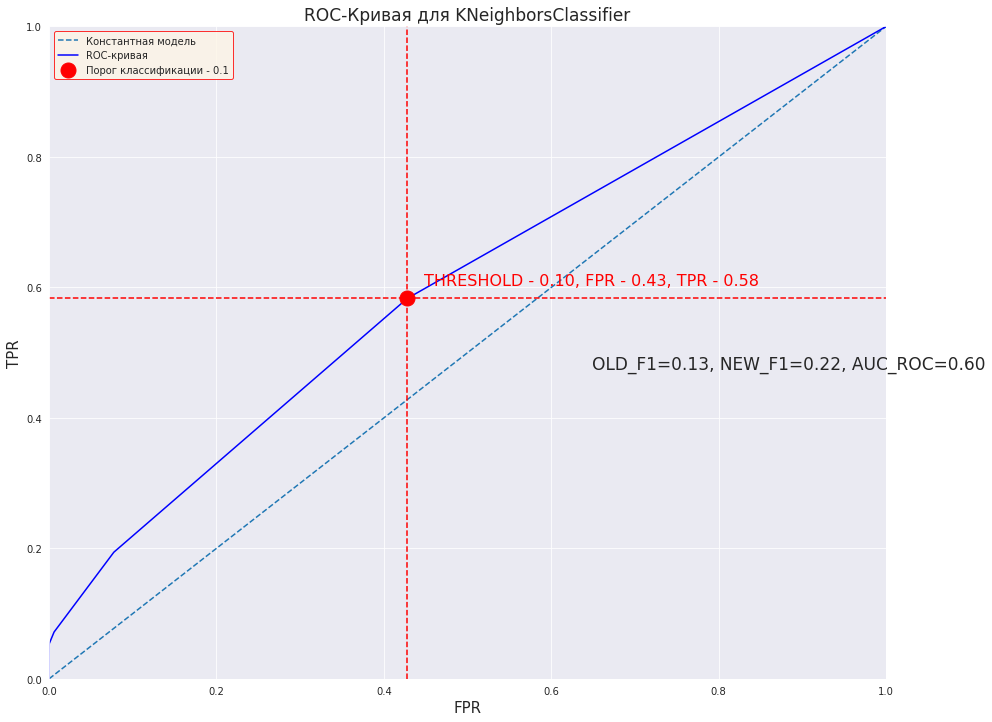

In [68]:
old_f1_test_knb = f1_score(y_test, test_model_knb.predict(x_test))
draw_graph_roc_curve([old_f1_test_knb, best_threshold_knb, best_test_f1], probabilities_one_test_knb, 'KNeighborsClassifier')

## Выводы

In [69]:
model = []
train_f1 = []
f1_test = []
for k in dct_with_models_param.keys():
    model.append(k)
    train_f1.append(dct_with_models_param[k]['train_f1'])
    f1_test.append(dct_with_models_param[k]['test_f1'])

In [70]:
results = {
    'Model' : model,
    'Train F1' :pd.Series(train_f1),
    'Test F1' :pd.Series(f1_test)}

In [71]:
display(pd.DataFrame(results))

,Model,Train F1,Test F1
0,LR,0.755812,0.752039
1,DTC,0.639768,0.632777
2,LinearSVC,0.754704,0.745483
3,MNB,0.620398,0.635624
4,KNB,0.098719,0.219034


## Вывод

**Наилучшая метрика у модели "Логистическая регрессия".**

**Так же, линейные модели значительно быстрее обучаются и работают .**